<h1 align="center">Machine Learning for NLP</h1>
    <h2 align="center">Text Preprocessing</h2>
    <h3 align="center">Zahra Amini</h3>
<div style="width: 100%; text-align: center;">
    <table>
        <tr>
            <td>
                <a class="link" href="https://t.me/Zahraamini_ai">Telegram</a><br>
                <a class="link" href="https://www.linkedin.com/in/zahraamini-ai/">LinkedIn</a><br>
                <a class="link" href="https://www.youtube.com/@AcademyHobot">YouTube</a><br>
            </td>
            <td>
                <a class="link" href="https://github.com/aminizahra">GitHub</a><br>
                <a class="link" href="https://www.kaggle.com/aminizahra">Kaggle</a><br>
                <a class="link" href="https://www.instagram.com/zahraamini_ai/">Instagram</a><br>
            </td>
        </tr>
    </table>
</div>

## Libraries

In [3]:
# pip install unidecode

In [4]:
import pandas as pd

import re

from unidecode import unidecode

import nltk
from nltk.tokenize import word_tokenize

from nltk.tokenize import sent_tokenize

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
# Download Required NLTK Data if Not Already Installed
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load Data

In [8]:
file_path = 'TwitterSentimentAnalysis.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)

data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

data = data[['target', 'text']]

In [9]:
print(data.head())

   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....


In [10]:
data['sentiment'] = data['target'].apply(lambda x: 'negative' if x == 0 else ('neutral' if x == 2 else 'positive'))

print(data['sentiment'].value_counts())

sentiment
negative    800000
positive    800000
Name: count, dtype: int64


## Lowercasing Text

In [12]:
data['text'] = data['text'].str.lower()

## Removing Special Characters from Text

In [14]:
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

## Define and Replace Contractions

In [16]:
contractions = {
    "i'm": "i am",
    "don't": "do not",
    "can't": "cannot",
    "won't": "will not",
    "you're": "you are",
    "they're": "they are",
    "i've": "i have",
    "it's": "it is",
}

In [17]:
def expand_contractions(text):
    for contraction, expansion in contractions.items():
        text = re.sub(r'\b' + contraction + r'\b', expansion, text)
    return text

In [18]:
data['text'] = data['text'].apply(expand_contractions)

## Convert Accented Characters to Simple Letters

In [20]:
data['text'] = data['text'].apply(lambda x: unidecode(x))

## Remove URLs

In [22]:
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

## Remove @ and # Characters

In [24]:
data['text'] = data['text'].apply(lambda x: re.sub(r'[@#]\w+', '', x))

## Remove Other Unnecessary Symbols

In [26]:
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

## Sentence Tokenization for Each Tweet

In [28]:
data['sentence_tokens'] = data['text'].apply(sent_tokenize)

## Word Tokenization for Each Tweet

In [30]:
data['word_tokens'] = data['text'].apply(word_tokenize)

## Save Preprocessed Data to a New CSV File

In [32]:
data.to_csv('preprocessedTweet.csv', index=False)

## Visualize unique word count and word frequency

In [34]:
# Function to calculate unique word count and word frequency
def plot_word_distribution(text_data, title):
    word_counts = Counter(" ".join(text_data).split())
    unique_words = len(word_counts)
    common_words = word_counts.most_common(20)

    # Plotting the chart
    plt.figure(figsize=(12, 6))
    plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
    plt.title(f"{title} - Unique Word Count: {unique_words}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

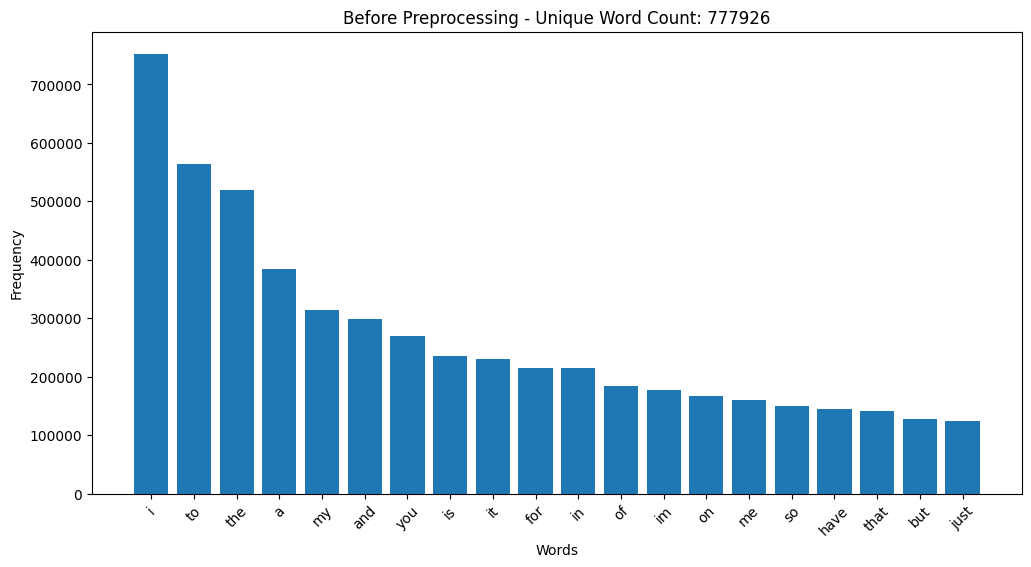

In [35]:
# Calculate and display word frequency before preprocessing
plot_word_distribution(data['text'], "Before Preprocessing")

<div style="background-color: #dafbe1; border-left: 5px solid #34c759; padding: 10px;">

This chart pertains to the frequency of vocabulary before preprocessing the Twitter data. At this stage, the number of unique words in the data is 777,926, with a high frequency observed in common English words. Words like "I", "to", "the", "a", "my", and "and", which are frequent and meaningless (stop words), have the highest occurrence. This issue indicates that preprocessing the text to remove stop words can help reduce data size and improve model accuracy.<br><br>
Analyzing this chart shows that common and meaningless words constitute a large percentage of the total data, making their removal or reduction in later preprocessing stages essential.
</div>

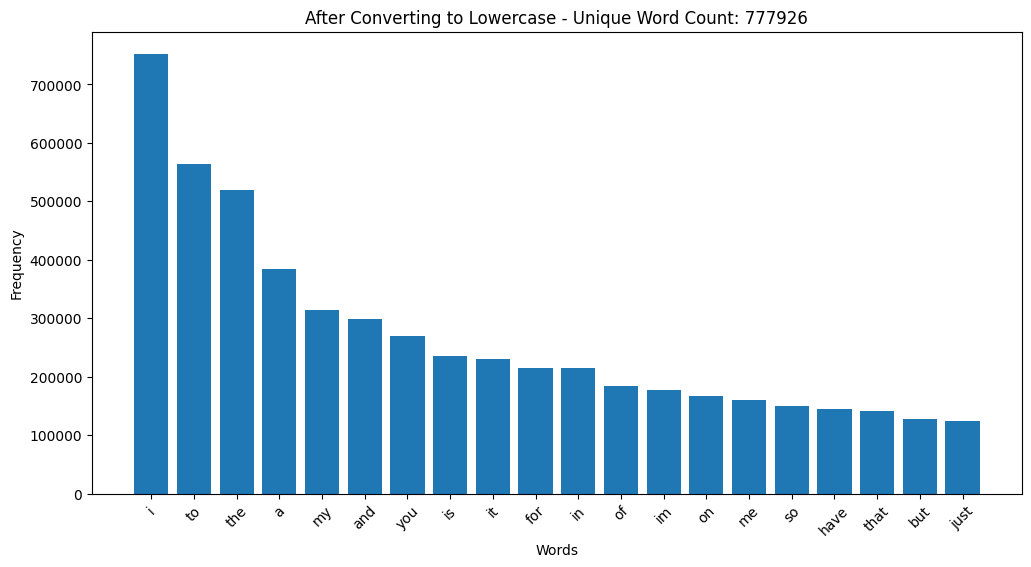

In [37]:
# Calculate and display word frequency after each preprocessing step
plot_word_distribution(data['text'].str.lower(), "After Converting to Lowercase")

<div style="background-color: #dafbe1; border-left: 5px solid #34c759; padding: 10px;">

This chart shows that after converting all words to lowercase, the number of unique words remains unchanged at 777,926. This indicates that in the original data, most words were likely in lowercase or that there were very few uppercase instances that had a negligible impact on the unique word count.<br><br>
Additionally, the order and frequency of stop words have not changed, and common words like "I", "to", "the", "a", and "my" remain at the top. This step helps standardize the data and ensures that both the uppercase and lowercase versions of a word are treated as a single word, which will be useful in the next preprocessing stage, such as removing stop words.
</dv>


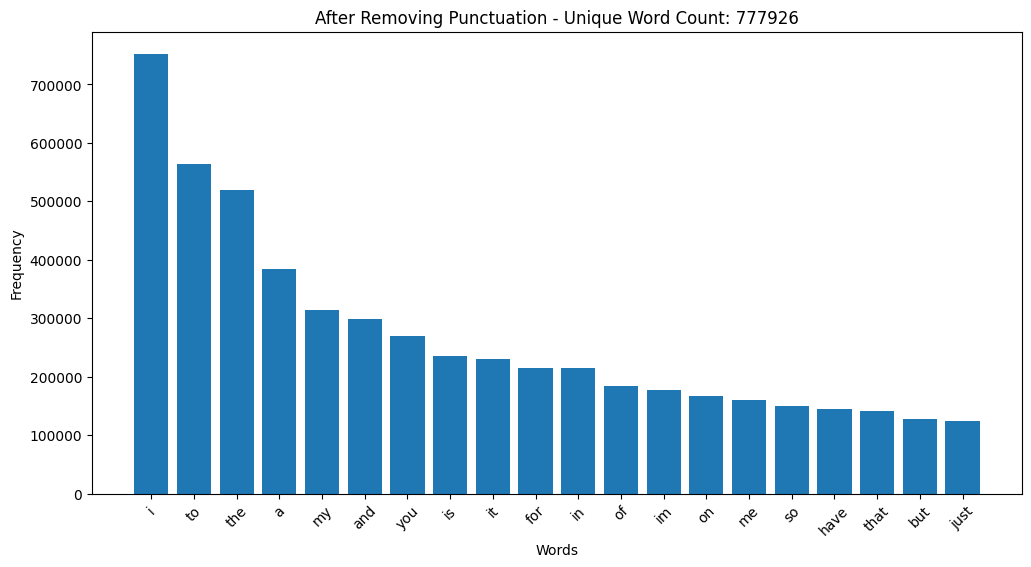

In [39]:
plot_word_distribution(data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x)), "After Removing Punctuation")

<div style="background-color: #dafbe1; border-left: 5px solid #34c759; padding: 10px;">

This chart shows that after removing punctuation, the number of unique words remains unchanged at 777,926. This suggests that punctuation did not significantly contribute to the increase in unique word count, or perhaps the main words (those recognized as common words) did not include punctuation.<br><br>
Removing punctuation helps ensure that words combined with punctuation appear uniformly in the data and are not considered as different words with varying meanings in subsequent analyses. However, the same frequent words like "I", "to", "the", "a", "my", etc., still dominate the frequency, indicating that while this step has improved data quality, further stages such as removing stop words are still needed to eliminate meaningless words.
</dv>


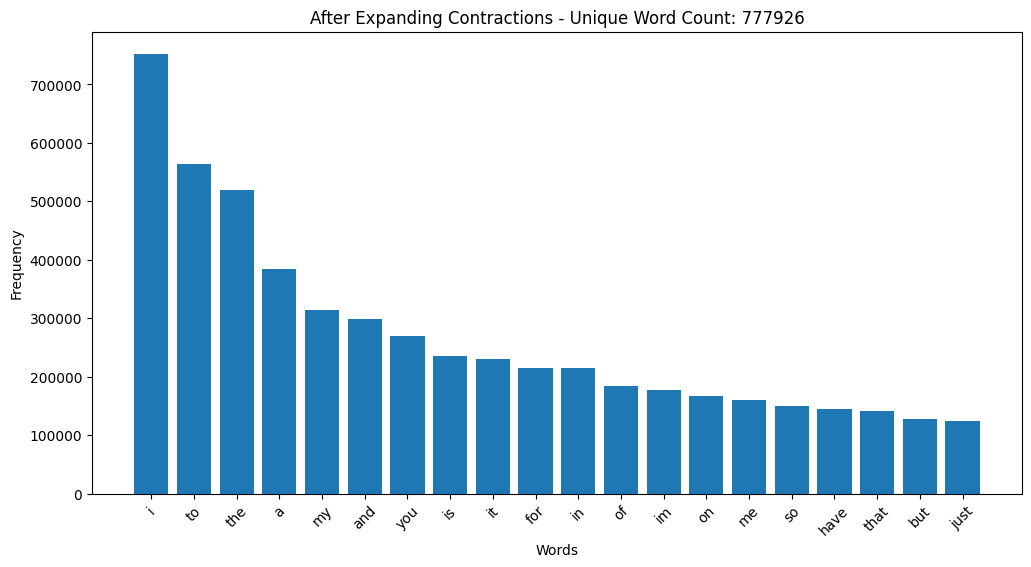

In [41]:
plot_word_distribution(data['text'].apply(expand_contractions), "After Expanding Contractions")

<div style="background-color: #dafbe1; border-left: 5px solid #34c759; padding: 10px;">

This chart shows that after expanding contractions in the text, the number of unique words remains unchanged at 777,926. This may be because the tweet data did not contain many contractions, or the contracted forms were recorded uniquely without repetition in earlier preprocessing stages.<br><br>
Expanding contractions typically helps improve the consistency of the data, ensuring that full word forms are used instead of contractions, which can be beneficial in subsequent text processing and analysis stages. Nevertheless, frequent words still include "I", "to", "the", "a", "my", etc., indicating that commonly used and meaningless words are still present in the data, and subsequent steps, such as removing stop words, will be essential for improving data quality.
</dv>
